Imports

In [174]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import sklearn
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import ensemble, tree

from sklearn.model_selection import cross_val_score, GridSearchCV

Helper Function

In [97]:
def write_answer(answer, num):
    with open(f"answer{num}.txt", "w") as file:
        file.write(str(answer))
        
def fit_and_get_cross_val_score(estimator, X, target):
    estimator.fit(X, target)
    mean_score = cross_val_score(estimator, X, target,cv=CV, n_jobs=2).mean()
    
    return mean_score

Prepare Data

In [87]:
data = datasets.load_digits()
X, target = data['data'], data['target']

Globals

In [130]:
CV = 10

SAMPLES_COUNT, FEATURES_COUNT = X.shape[0], X.shape[1]

DecisionTreeClassifier

In [131]:
decision_tree = DecisionTreeClassifier()

mean_score = fit_and_get_cross_val_score(decision_tree, X, target)

print('Score of DecisionTreeClassifier:', mean_score)

Score of DecisionTreeClassifier: 0.8185754189944134


In [132]:
write_answer(mean_score, 1)

BaggingClassifier

In [133]:
estimator = ensemble.BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=100,
    random_state=0
)

mean_score = fit_and_get_cross_val_score(estimator, X, target)

print('Score of BaggingClassifier:', mean_score)

Score of BaggingClassifier: 0.927048417132216


In [134]:
write_answer(mean_score, 2)

BaggingClassifier with parameter _q_

In [163]:
bclf = ensemble.BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_features=MAX_CLASSIFIER_FEATURES_COUNT,
    random_state=0
)

mean_score = fit_and_get_cross_val_score(bclf, X, target)

print('Score of BaggingClassifier with parameter q:', mean_score)

Score of BaggingClassifier with parameter q: 0.9293389199255122


In [164]:
write_answer(mean_score, 3)

BaggingClassifier with parameter _q_ and random features

In [149]:
estimator = ensemble.BaggingClassifier(
    DecisionTreeClassifier(
        max_features="sqrt",
        splitter="random",
    ), 
    n_estimators=100, 
    bootstrap=False,
    random_state=0
)

mean_score = fit_and_get_cross_val_score(estimator, X, target)

print('Score of BaggingClassifier with random features:', mean_score)

Score of BaggingClassifier with random features: 0.9593916821849783


In [150]:
write_answer(mean_score, 4)

Random Forest

1) Случайный лес сильно переобучается с ростом количества деревьев - 

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев +

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. +

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. +

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. -

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. -

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). +

In [251]:
write_answer('2 3 4 7', 5)

In [160]:
grid_param = {
    "n_estimators": [5, 10, 15, 100, 200, 300],
    "max_features": [5, 10, 40, 50, 60],
    "max_depth": [5, 6, None]
}

estimator = GridSearchCV(RandomForestClassifier(), grid_param, cv=CV, n_jobs=3)
estimator.fit(X, target)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [5, 6, None],
                         'max_features': [5, 10, 40, 50, 60],
                         'n_estimators': [5, 10, 15, 100, 200, 300]})

In [198]:
params = pd.DataFrame(estimator.cv_results_['params'])
scores = estimator.cv_results_['mean_test_score']

Text(0, 0.5, 'accuracity')

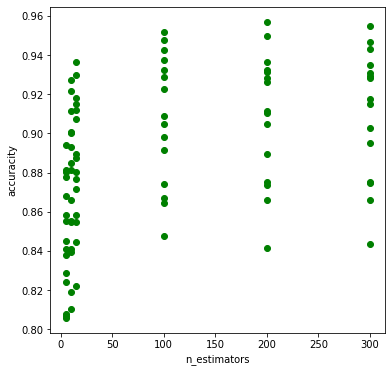

In [355]:
plt.figure(figsize=(6, 6))

for n_estimators in grid_param["n_estimators"]:
    for ind in params[(params['n_estimators']==n_estimators)].index:
        plt.scatter(n_estimators, scores[ind], color='green')
    
plt.xlabel("n_estimators")
plt.ylabel("accuracity")

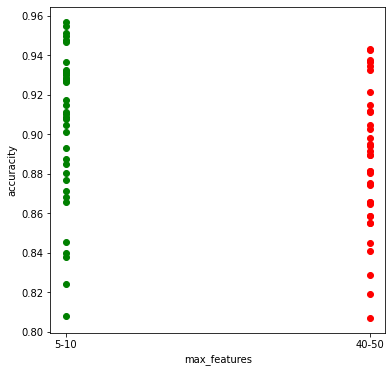

In [245]:
params[params['max_depth']==6]
plt.figure(figsize=(6, 6))

for ind in params[(params['max_features']==5) | (params['max_features']==10)].index:
    plt.scatter('5-10', scores[ind], color='green')
    
for ind in params[(params['max_features']==40) | (params['max_features']==50)].index:
    plt.scatter('40-50', scores[ind], color='red')
    
plt.xlabel('max_features')
plt.ylabel('accuracity')

plt.show()

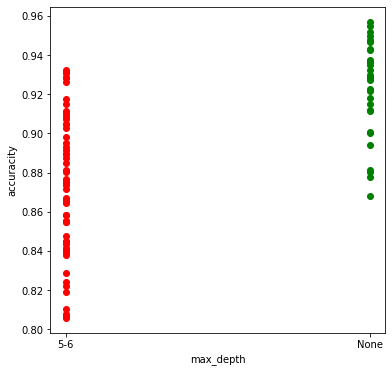

In [250]:
params[params['max_depth']==6]
plt.figure(figsize=(6, 6))

for ind in params[(params['max_depth']==5) | (params['max_depth']==6)].index:
    plt.scatter('5-6', scores[ind], color='red')
    
for ind in params[np.isnan(params['max_depth'])].index:
    plt.scatter('None', scores[ind], color='green')
    
plt.xlabel('max_depth')
plt.ylabel('accuracity')

plt.show()